# Telco Churn Project - Working Notebook

## I: PLAN

The goal of this stage is to clearly define your goal(s), measures of success, and plans on how to achieve that.

#### 1.  GOAL:
The goal of this project is to identify key drivers of churn for Telco, a telecommunications company, and make recommendations to reduce churn in order to increase customer retention, and ultimately increase revenue. Churn is another term for attrition and is represented by the percentage of customers who stop doing business with the company. Through machine learning and statistical analysis, predictions of future churn will be identified and recommendations for prevention will be made in order to improve customer retention.


#### 2. DESCRIPTION:

With an ever-competitive telecommunications market, it is vital to understand your customer base in order to prevent customer churn and maximize retention.  It is far less expensive to keep an existing customer than it is to acquire a new one for the long term when marketing costs are included. Therefore, it is important to identify drivers of churn in an effort to prevent attrition. Thus, retaining current customers for the long term.  Ultimately, customer retention is important for maintaining and increasing profit.  This project will identify key drivers of churn for the Telco dataset and use modeling and statistics to identify ways to prevent churn in the future. Ultimately it will provide a recommendation that could be used by Telco or other customer-based service companies to maximize retention. 


#### 3. INITIAL QUESTIONS: 
The focus of the project is on decreasing customer churn and increasing retention, which can have a significant impact on revenue and entity reputation. Below are some of the initial questions this project looks to answer throughout the Data Science Pipeline. 


##### Data-Focused Questions
- What types of customers do we have?
- What services do we offer?
- What customer base contributes the most to churn?
- What service types contribute most to churn?
- What is our total revenue?
- What amount of revenue is impacted by the overall churn?
- What amount of revenue is impacted by the customer base that churns the most?
- What amount of revenue is impacted by the service type that churns the most?

##### Overall Project-Focused Questions

- What will the end product look like?
- What format will it be in?
- Who will it be delivered to?
- How will it be used?
- How will I know I'm done?
- What is my MVP?
- How will I know it's good enough?


## II: ACQUIRE
The goal is to create a path from original data sources to the environment in which you will work with the data. You will gather data from sources in order to prepare and clean it in the next step.

In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Use the acquire module to acquire the data into a dataframe 
# - accessing a cached version (.csv) for faster processing
acquire_df = acquire.get_telco_data()
acquire_df.head(3)

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


## III: PREPARE / WRANGLE

The goal is to have data, split into 3 samples (train, validate, and test), in a format that can easily be explored, analyzed, and visualized. The data is split so that we have a sample we can use to test our final model, one that was not used in the exploration of the data or the development of the model. This helps us understand the generality of the model.


In order to have data that is useful, the data needs to be examined in order to determine how to prepare it best for exploration. 
To do this, start by summarizing the data. While summarizing it, analyze and address ways to clean the data to make it tidy. After summarizing and cleaning the data, split the dataset into the train, validate, and test samples. 

#### 1. SUMMARIZE THE DATA
- .shape
- .head()
- .info()
- .describe()
- .isnull()
- .value_counts()
-  view visualizations of numeric data.

In [3]:
# STEP 2: Prepare - Summarize the Data - .shape

In [4]:
prepare_df = acquire_df
prepare_df.shape

(7043, 24)

In [5]:
# STEP 2: Prepare - Summarize the Data - .head()

# Use the acquire module to acquire the data into a dataframe(df) 
# - accessing a cached version (.csv) for faster processing

'''
View the df, looking at column headings and values within the series.
Due to it being a df with many columns, using transpose makes it easier to view in one frame.
Note columns that may need cleaning in order to be useful, such as duplicate columns, 
unnecessary columns, or categorical/object data that may need encoding. 
'''

prepare_df = prepare.get_telco_data()
prepare_df.head(3).T

Reading from csv file...


,0,1,2
payment_type_id,2,2,1
internet_service_type_id,1,1,2
contract_type_id,2,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ
gender,Female,Male,Male
senior_citizen,0,0,0
partner,Yes,No,No
dependents,Yes,No,No
tenure,9,9,4
phone_service,Yes,Yes,Yes


In [6]:
# STEP 2: Prepare - Summarize the Data - .info()
'''
Review the index, series names,  non-missing value (non-null) counts, and data types for each series.
Verify all columns have the number of values congruent with the number of rows in .shape (no missing values).
Verify the data types are congruent with what is expected, given the feature.
'''
prepare_df.info()

# Observation: 18 object columns, 5 int64 columns, and 1 float column.
# Observation: There does not appear to be any missing data, as all row non-Null values are equivalent to .shape.
# Observation: Difference in monetary data types; monthly_charges is a float and total_charges is an integer. 
# Observation: There are some columns that have some overlapping data, such as payment_type_id and payment_type 
# - that data can be encoded. Once encoded, the non-numeric column can be dropped. 
# Observation: Encode all columns with object type data:  
# - gender, partner, dependents, phone_service, multiple_lines, online_security,
# - online_backup, device_protection, tech_support, streaming_tv, streaming_movies,
# - paperless_billing, churn, contract_type, internet_service_type, payment_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
# STEP 2: Prepare - Summarize the Data - .describe()
'''
First, change the total_charges column to a float, so the monetary datatypes are appropriately standardized, 
for accurate comparison.
Then, view the statistical information related to all numeric values
'''
prepare_df['total_charges'] = prepare_df.total_charges.replace(' ', np.nan).astype(float)
prepare_df[['tenure','monthly_charges', 'total_charges']].describe().T

#Observation: Count of total charges not equivalent to count of monthly charges. 
# - Could be attributed to new customers. 
# - Will need to drop these rows, so they are not included in the current customer churn rate. 

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [8]:
# STEP 2: Prepare - Summarize the Data - - .isnull()
'''
Get a count of missing values, even though the series value counts 
within .info() above demonstrated none,it is good to have further evidence. 
If missing values are present, run this code:
'''
prepare_df.isnull().sum()
# Observation: There are 11 missing values in the total_charges column. 
# - We will want to drop these rows, as they are a small part of our dataset, but may impact statistical calculation.

payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64

In [9]:
# STEP 2: Prepare - Summarize the Data - - .isnull()
'''
Another way to quickly identify null values
'''
missing = prepare_df.isnull().sum()
missing[missing > 0]

total_charges    11
dtype: int64

No     5174
Yes    1869
Name: churn, dtype: int64


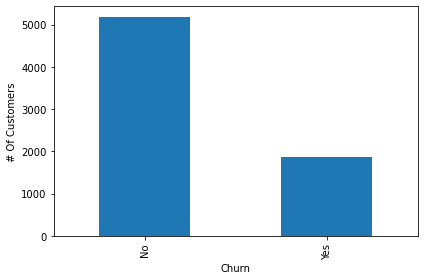

In [10]:
# STEP 2: Prepare - Summarize the Data - value_counts()
'''
Get an eye on the target by viewing the distribution 
of the target variable "churn" in numeric and visual form. 
'''
print(prepare_df.churn.value_counts())
prepare_df.churn.value_counts().plot.bar()
plt.xlabel('Churn')
plt.ylabel('# Of Customers')
plt.tight_layout()
plt.show()

No     5174
Yes    1869
Name: churn, dtype: int64


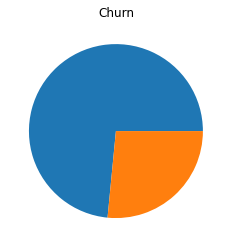

In [11]:
# STEP 2: Prepare - Summarize the Data - value_counts()
'''
Another visual option. 
'''
print(prepare_df.churn.value_counts())
y = prepare_df.churn.value_counts()
plt.title('Churn')
plt.pie(y)
plt.show() 

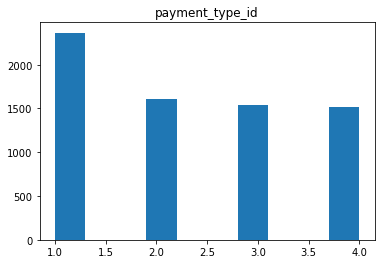

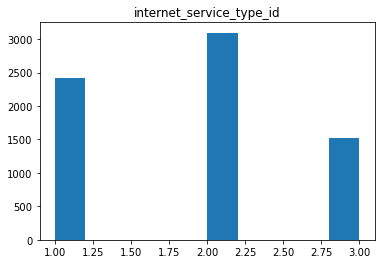

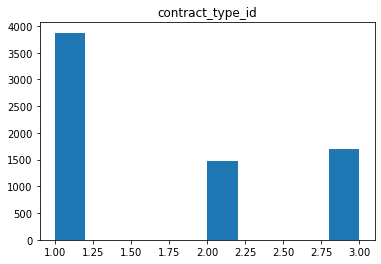

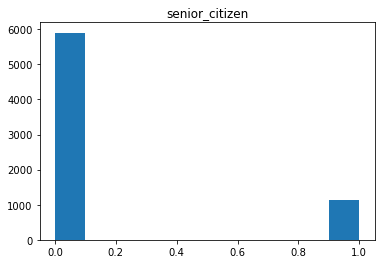

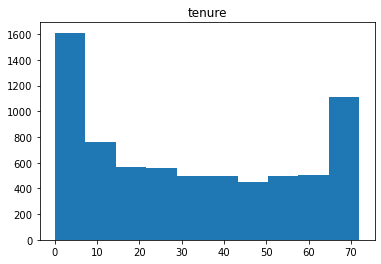

In [12]:
# STEP 2: Prepare - Summarize the Data - view visualizations of numeric data.
'''
Look at distributions of NUMERIC - CATEGORICAL columns.
'''

num_cols = prepare_df.columns[[prepare_df[col].dtype == 'int64' for col in prepare_df.columns]]
for col in num_cols:
    plt.hist(prepare_df[col])
    plt.title(col)
    plt.show()
    
# Observation: payment_type_id, internet_service_type_id, contract_type_id, and senior_citizen are counts/discrete data.
# Observation: tenure may be useful for comparison as a continuous feature. 

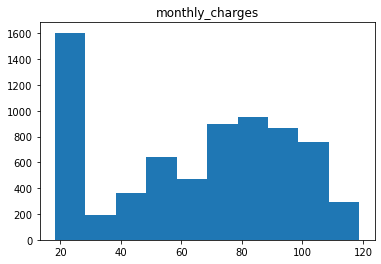

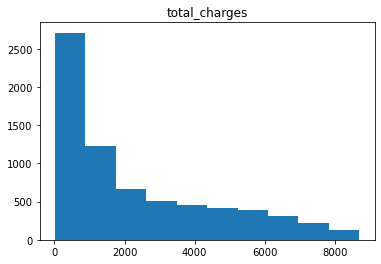

In [13]:
# Step 2: Clean - encode columns 
'''
Look at distributions of NUMERIC columns.
'''

num_cols = prepare_df.columns[[prepare_df[col].dtype == 'float64' for col in prepare_df.columns]]
for col in num_cols:
    plt.hist(prepare_df[col])
    plt.title(col)
    plt.show()

#### 2. CLEAN THE DATA
##### Summarizing Data Takeaways
    
    - Address Missing/Null Values
        - drop null value rows in total_charges
        
    - Drop Unnecessary Columns & Rows
        - check for duplicate values 
        - drop customer_ID
        - drop columns that provide duplicate data
            - 'payment_type_id', 'internet_service_type_id', 'contract_type_id'
        
    - Rename Columns
        - for ease of use after encoding
        
    - Standardize Data Types
        - monetary columns standardize to float
        
    - Create Numeric Datatypes (Encode)
        - 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
        - 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
        - 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type'
        - drop original columns after encoding

In [14]:
# STEP 2: Prepare - Clean the Data - Address Missing/Null Values
'''
Brand new customers will not be included in the churn stats, so we need to drop them from the data.
'''
clean_df = prepare_df[prepare_df.tenure != 0]
print(f'Original Rows and Columns: {acquire_df.shape}')
print(f'Cleaned Rows and Columns: {clean_df.shape}')

# Observations: 11 new customer observations dropped. 

Original Rows and Columns: (7043, 24)
Cleaned Rows and Columns: (7032, 24)


In [15]:
# Step 2: Prepare / Clean - Drop Unnecessary Columns & Rows
'''
Drop dulplicates, if any
Check shape to see verify if there were any duplicates
'''
clean_df = clean_df.drop_duplicates()
clean_df.shape

# Observation: no change in shape, indicates there were no duplicates.

(7032, 24)

In [16]:
# Step 2: Prepare / Clean - Drop Unnecessary Columns & Rows
'''
Drop unnecessary columns
'''
clean_df = clean_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
clean_df.shape

# Observation: 4 fewer columns

(7032, 21)

In [17]:
# Step 2: Prepare / Clean -  Rename Columns 
'''
Rename columns for consistency and readability. 
'''
clean_df = clean_df.rename(columns={'gender': 'is_male', 'senior_citizen': 'is_senior', 'tenure': 'tenure_months',
                                   'partner': 'has_partner', 'dependents': 'has_dependents',
                                    'phone_service': 'has_phone_service','multiple_lines': 'has_multiple_lines', 
                                    'online_security': 'has_online_security', 'online_backup': 'has_online_backup' , 
                                    'device_protection': 'has_device_protection', 'tech_support': 'has_tech_support',
                                   'streaming_tv': 'has_streaming_tv', 'streaming_movies': 'has_streaming_movies', 
                                   'paperless_billing': 'has_paperless_billing', 'churn': 'did_churn'})

In [18]:
 # Step 2: Prepare / Clean - Verify Standardized Data Types
'''
Monetary columns were previously dealth with.
Verify the other columns will need encoding
'''
    
clean_df.dtypes

customer_id               object
is_male                   object
is_senior                  int64
has_partner               object
has_dependents            object
tenure_months              int64
has_phone_service         object
has_multiple_lines        object
has_online_security       object
has_online_backup         object
has_device_protection     object
has_tech_support          object
has_streaming_tv          object
has_streaming_movies      object
has_paperless_billing     object
monthly_charges          float64
total_charges            float64
did_churn                 object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [19]:
 # Step 2: Prepare / Clean - Create Numeric Datatypes (Encode)
    
'''
Obtain list of categorical columns that will need encoded
'''

categorical_columns = list(clean_df.dtypes[clean_df.dtypes == 'object'].index)
categorical_columns

['customer_id',
 'is_male',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_multiple_lines',
 'has_online_security',
 'has_online_backup',
 'has_device_protection',
 'has_tech_support',
 'has_streaming_tv',
 'has_streaming_movies',
 'has_paperless_billing',
 'did_churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [20]:
# Step 2: Clean - Encode Columns 
'''
Identify categorical columns that will need encoded.
'''
catcols = [col for col in clean_df.columns if clean_df[col].dtype == 'O']

In [21]:
# Step 2: Clean - Encode Columns 

'''
Look at value counts in each of the categorical columns, noting which value is the mode for each category
'''

for col in catcols:
    print(f'Column: {col}')
    print(clean_df[col].value_counts())
    print('-------')
    print(clean_df[col].value_counts(normalize=True, dropna=False))
    print('====================')

Column: customer_id
0002-ORFBO    1
6619-RPLQZ    1
6629-LADHQ    1
6629-CZTTH    1
6627-CFOSN    1
             ..
3359-DSRKA    1
3354-OADJP    1
3352-RICWQ    1
3352-ALMCK    1
9995-HOTOH    1
Name: customer_id, Length: 7032, dtype: int64
-------
0002-ORFBO    0.000142
6619-RPLQZ    0.000142
6629-LADHQ    0.000142
6629-CZTTH    0.000142
6627-CFOSN    0.000142
                ...   
3359-DSRKA    0.000142
3354-OADJP    0.000142
3352-RICWQ    0.000142
3352-ALMCK    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7032, dtype: float64
Column: is_male
Male      3549
Female    3483
Name: is_male, dtype: int64
-------
Male      0.504693
Female    0.495307
Name: is_male, dtype: float64
Column: has_partner
No     3639
Yes    3393
Name: has_partner, dtype: int64
-------
No     0.517491
Yes    0.482509
Name: has_partner, dtype: float64
Column: has_dependents
No     4933
Yes    2099
Name: has_dependents, dtype: int64
-------
No     0.701507
Yes    0.298493
Name: has_dependents, dtype

In [22]:
# Step 2: Clean - encode columns 

# make variable of list of columns to encode
columns = ['is_male',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_multiple_lines',
 'has_online_security',
 'has_online_backup',
 'has_device_protection',
 'has_tech_support',
 'has_streaming_tv',
 'has_streaming_movies',
 'has_paperless_billing',
 'did_churn',
 'contract_type',
 'internet_service_type',
 'payment_type'
          ]

# make dummy columns for  all columns in the list
Dummies = pd.get_dummies(clean_df[columns], drop_first=True)

# add dummy columns onto clean_df
clean_df = pd.concat([clean_df, Dummies] , axis=1)

# drop original columns after adding the dummy columns
clean_df = clean_df.drop(columns=(['is_male',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_multiple_lines',
 'has_online_security',
 'has_online_backup',
 'has_device_protection',
 'has_tech_support',
 'has_streaming_tv',
 'has_streaming_movies',
 'has_paperless_billing',
 'did_churn'
]))

# Verify datatypes for categorical columns are what they need to be
clean_df.dtypes

# Observation: Monetary datatypes are in a format that is appropriate (float)

customer_id                                   object
is_senior                                      int64
tenure_months                                  int64
monthly_charges                              float64
total_charges                                float64
contract_type                                 object
internet_service_type                         object
payment_type                                  object
is_male_Male                                   uint8
has_partner_Yes                                uint8
has_dependents_Yes                             uint8
has_phone_service_Yes                          uint8
has_multiple_lines_No phone service            uint8
has_multiple_lines_Yes                         uint8
has_online_security_No internet service        uint8
has_online_security_Yes                        uint8
has_online_backup_No internet service          uint8
has_online_backup_Yes                          uint8
has_device_protection_No internet service     

In [23]:
# Dropping columns that produce duplicate information to - no_internet

clean_df = clean_df.drop(columns=([
 'has_online_security_No internet service',
 'has_online_backup_No internet service',
 'has_device_protection_No internet service',
 'has_tech_support_No internet service',
 'has_streaming_tv_No internet service',
 'has_streaming_movies_No internet service']))

clean_df.dtypes

customer_id                              object
is_senior                                 int64
tenure_months                             int64
monthly_charges                         float64
total_charges                           float64
contract_type                            object
internet_service_type                    object
payment_type                             object
is_male_Male                              uint8
has_partner_Yes                           uint8
has_dependents_Yes                        uint8
has_phone_service_Yes                     uint8
has_multiple_lines_No phone service       uint8
has_multiple_lines_Yes                    uint8
has_online_security_Yes                   uint8
has_online_backup_Yes                     uint8
has_device_protection_Yes                 uint8
has_tech_support_Yes                      uint8
has_streaming_tv_Yes                      uint8
has_streaming_movies_Yes                  uint8
has_paperless_billing_Yes               

In [24]:
'''
acquire quantity of churn - which is the focus of the project
'''

clean_df['did_churn_Yes'].value_counts()

# Looking at the describe data function restuls I see:
# 1869/5163 customers who have churned

0    5163
1    1869
Name: did_churn_Yes, dtype: int64

In [39]:
'''
convert clean_df to explore_df for ease of tracking location in DataScience Pipeline
and for ease of going back and making corrections without it impacting entire pipeline.
'''
explore_df = clean_df
explore_df.shape

(7032, 29)

#### 3. SPLIT THE DATA
- Train - to use for exploration and modeling
- Validate - to use for validating best performing models
- Test - to use ONLY ONCE to confirm performance of best performing model on unseen data

In [45]:
def data_split(df):
    '''
    This function drops the customer_id column and then splits a dataframe into 
    train, validate, and test in order to explore the data and to create and validate models. 
    It takes in a dataframe. The target variable (for stratification purposes) is set within the function, 
    and contains an integer for setting a seed for replication. 
    Test is 20% of the original dataset. The remaining 80% of the dataset is 
    divided between valiidate and train, with validate being .30*.80= 24% of 
    the original dataset, and train being .70*.80= 56% of the original dataset. 
    The function returns, train, validate and test dataframes. 
    '''
    df = df.drop(columns=['customer_id'])
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.did_churn_Yes)   
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.did_churn_Yes)


    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
    
    return train, validate, test

In [46]:
train, validate, test = data_split(explore_df)

train -> (3937, 28)
validate -> (1688, 28)
test -> (1407, 28)


## IV: EXPLORE

The goal is to discover features that have the largest impact on the target variable, i.e. provide the most information gain, drive the outcome.

Use a correlation chart to spot potential relationships between features and churn.

Guide exploration using correlations and the initial questions to visualize relationships between churn and other variables to identify drivers of churn.

- What types of customers do we have?
- What services do we offer?
- What customer base contributes the most to churn?
- What service types contribute most to churn?
- What is our total revenue?
- What amount of revenue is impacted by the overall churn?
- What amount of revenue is impacted by the customer base that churns the most?
- What amount of revenue is impacted by the service type that churns the most?

### UNIVARIATE STATS:

0    2891
1    1046
Name: did_churn_Yes, dtype: int64


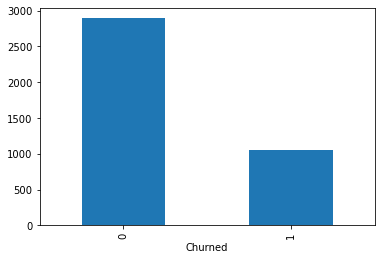

In [47]:
'''
Obtain visual and counts of churn within the train dataset.
'''
print(train.did_churn_Yes.value_counts())
train.did_churn_Yes.value_counts().sort_index().plot.bar()

plt.xlabel("Churned")
plt.show()

In [48]:
'''
Calculate rate of train sample that churned
'''
print("Percent churned from train")
round(train.did_churn_Yes.mean(), 2)

Percent churned from train


0.27

In [49]:
'''
Obtain categorical columns to explore visually
'''
categorical_columns = list(train.dtypes[train.dtypes == 'uint8'].index)
categorical_columns

['is_male_Male',
 'has_partner_Yes',
 'has_dependents_Yes',
 'has_phone_service_Yes',
 'has_multiple_lines_No phone service',
 'has_multiple_lines_Yes',
 'has_online_security_Yes',
 'has_online_backup_Yes',
 'has_device_protection_Yes',
 'has_tech_support_Yes',
 'has_streaming_tv_Yes',
 'has_streaming_movies_Yes',
 'has_paperless_billing_Yes',
 'did_churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

   is_male_Male_counts
1                 1976
0                 1961


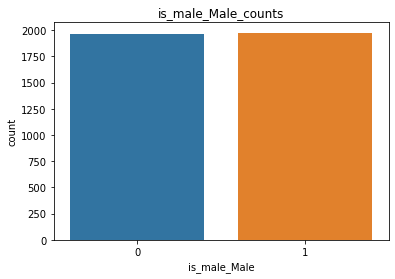

   has_partner_Yes_counts
0                    2027
1                    1910


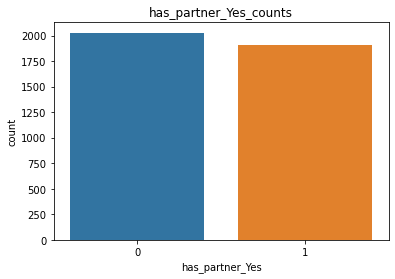

   has_dependents_Yes_counts
0                       2745
1                       1192


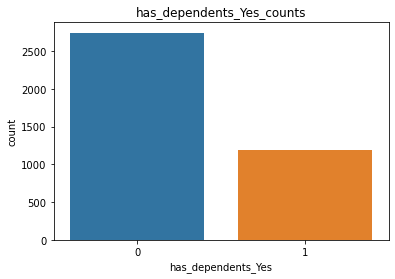

   has_phone_service_Yes_counts
1                          3564
0                           373


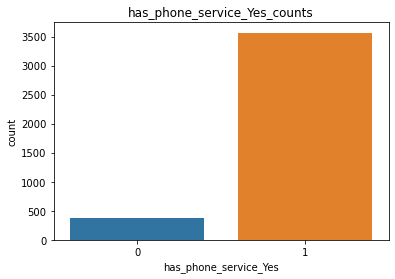

   has_multiple_lines_No phone service_counts
0                                        3564
1                                         373


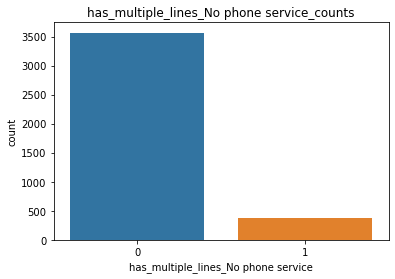

   has_multiple_lines_Yes_counts
0                           2268
1                           1669


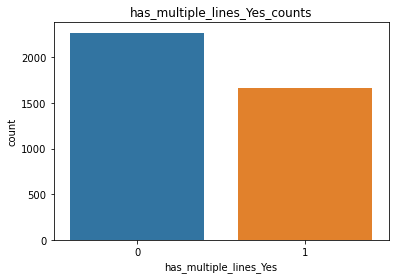

   has_online_security_Yes_counts
0                            2785
1                            1152


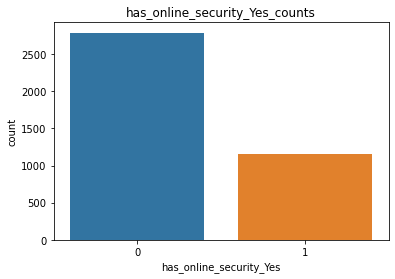

   has_online_backup_Yes_counts
0                          2564
1                          1373


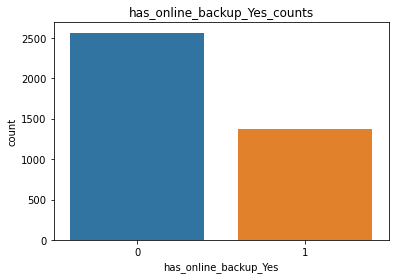

   has_device_protection_Yes_counts
0                              2560
1                              1377


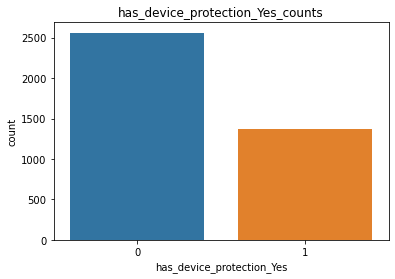

   has_tech_support_Yes_counts
0                         2798
1                         1139


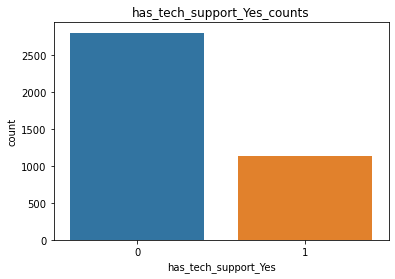

   has_streaming_tv_Yes_counts
0                         2416
1                         1521


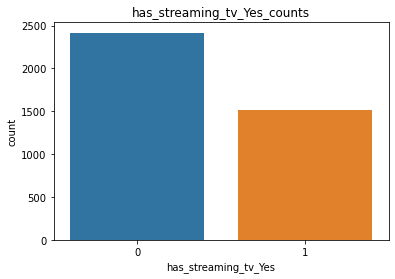

   has_streaming_movies_Yes_counts
0                             2396
1                             1541


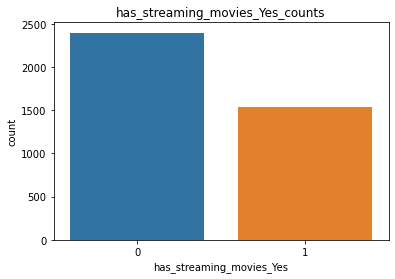

   has_paperless_billing_Yes_counts
1                              2324
0                              1613


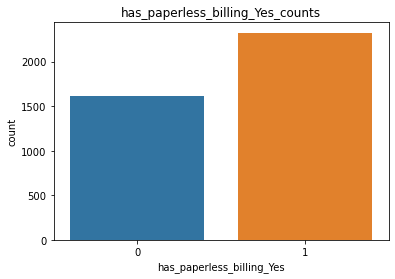

   did_churn_Yes_counts
0                  2891
1                  1046


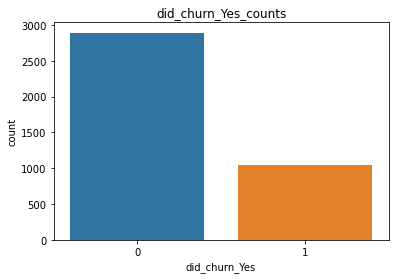

   contract_type_One year_counts
0                           3122
1                            815


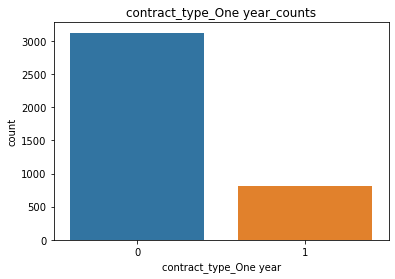

   contract_type_Two year_counts
0                           2980
1                            957


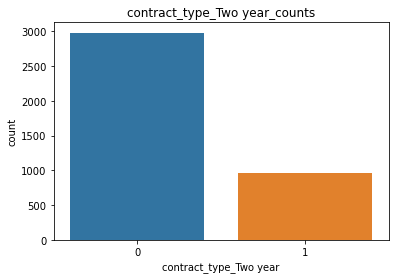

   internet_service_type_Fiber optic_counts
0                                      2215
1                                      1722


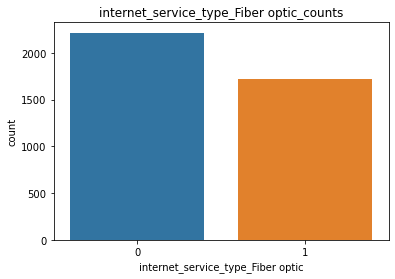

   internet_service_type_None_counts
0                               3070
1                                867


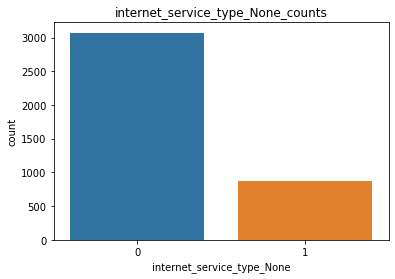

   payment_type_Credit card (automatic)_counts
0                                         3042
1                                          895


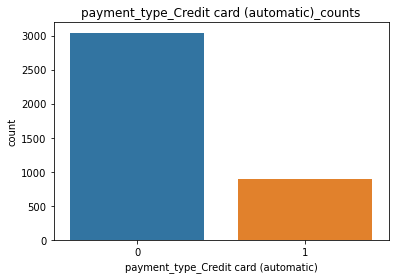

   payment_type_Electronic check_counts
0                                  2648
1                                  1289


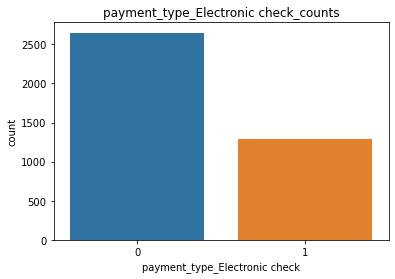

   payment_type_Mailed check_counts
0                              3046
1                               891


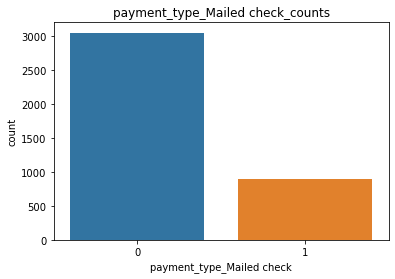

In [50]:
'''
Create visual of categorical column counts, looking for which categories demonstrate high churn counts.
'''

# for each of those columns
for col in categorical_columns:
    
    # display a frequency table
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))
    
    # display a bar plot of those frequencies
    sns.countplot(data=train, x=col)
    plt.title(f'{col}_counts')
    plt.show()

# Observation: Categories that do not appear to be correlated to churn based on counts:
    # - is_male_Male, has_partner_Yes, has_dependents_Yes, has_multiple_lines_No phone service.
    # - has_multiple_lines_Yes, has_online_security_Yes, has_online_backup_Yes, has_device_protection_Yes,
    # - has_tech_support_Yes, has_streaming_tv_Yes, has_streaming_movies_Yes, contract_type_One year,
    # - contract_type_Two year, internet_service_type_None, payment_type_Credit card (automatic), payment_type_Mailed check
    
# Observation: Categories that do appear to be correlated churn based on counts:   
    # - has_phone_service_Yes, has_multiple_lines_No phone service', has_paperless_billing_Yes,
    # - internet_service_type_Fiber optic, payment_type_Electronic check
    

                contract_type_counts
Month-to-month                  2165
Two year                         957
One year                         815


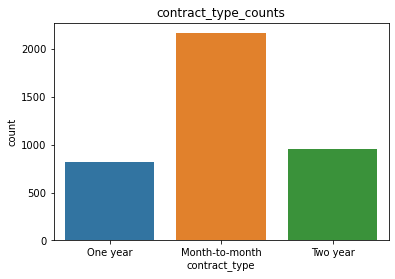

             internet_service_type_counts
Fiber optic                          1722
DSL                                  1348
None                                  867


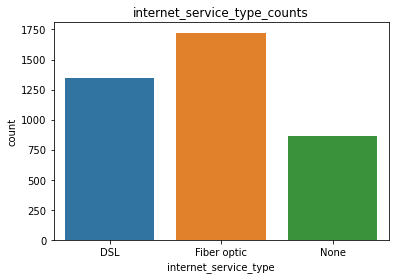

                           payment_type_counts
Electronic check                          1289
Credit card (automatic)                    895
Mailed check                               891
Bank transfer (automatic)                  862


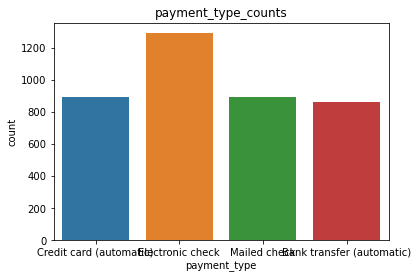

In [51]:
'''
Create visual of specified object columns (excluding customer_ID, looking for which categories demonstrate high churn counts.
'''
specified_object_col = ['contract_type', 'internet_service_type', 'payment_type']
    
for col in specified_object_col:
    
    # display a frequency table
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))
    
    # display a bar plot of those frequencies
    sns.countplot(data=train, x=col)
    plt.title(f'{col}_counts')
    plt.show()                         

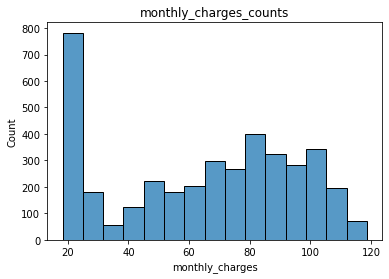

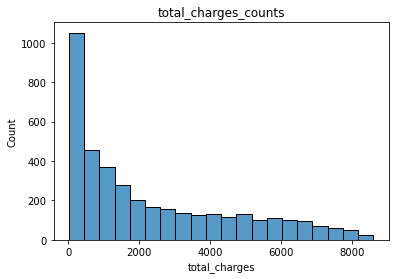

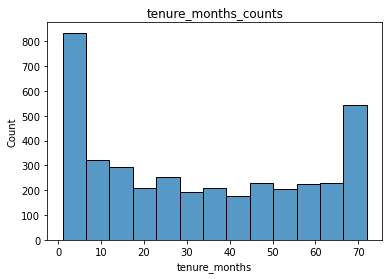

In [63]:
'''
Create visual of specified object columns (excluding customer_ID, looking for which categories demonstrate high churn counts.
'''
float_col = ['monthly_charges', 'total_charges', 'tenure_months']

for col in float_col:
    
    # display a bar plot of those frequencies
    sns.histplot(data=train, x=col)
    plt.title(f'{col}_counts')
    plt.show()      

### BIVARIATE STATS:

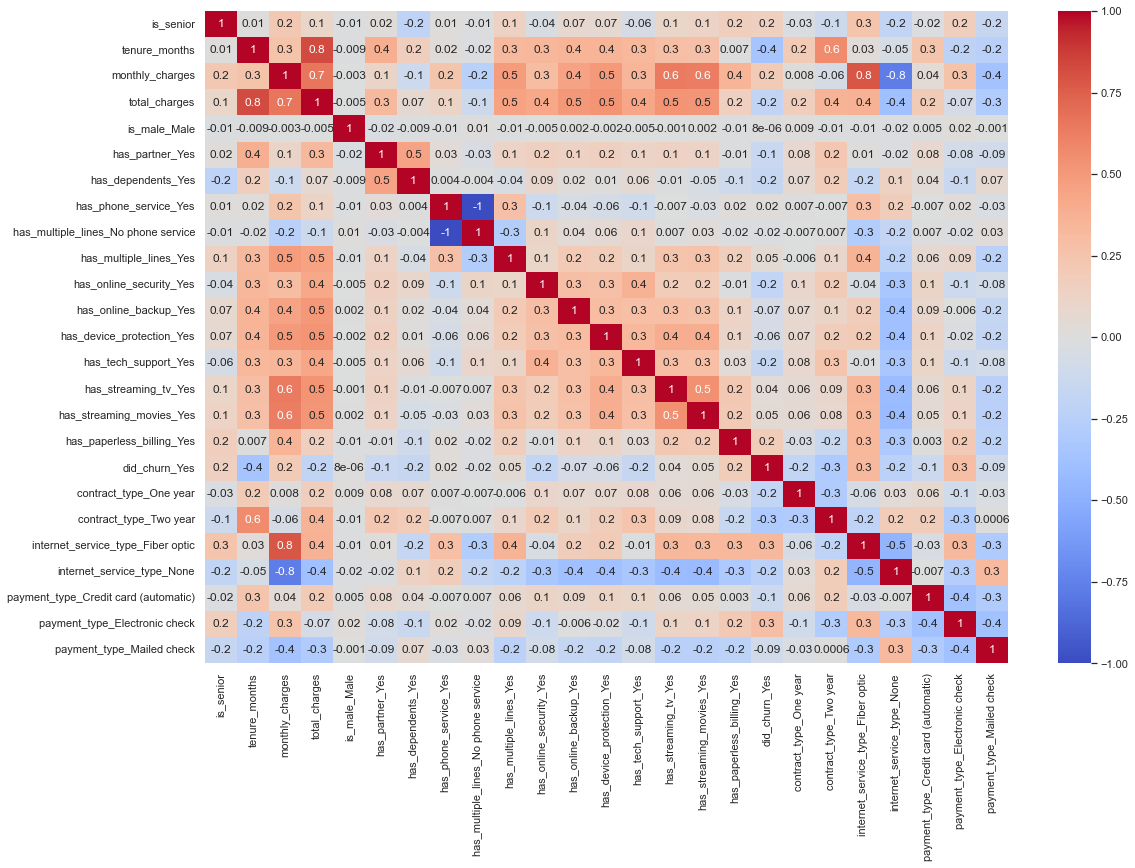

In [64]:
'''
Use a correlation matrix to look at relationships with 'did_churn'.
'''
correlations = train.corr()
plt.figure(figsize=(18,12))
sns.set_theme(style="white")
corr = correlations
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

# Obervation: Fiber Optic Internet and Electronic Check Payment show a correlation to churn of 0.3
# Observation: Monthly Charges shows a correlation to churn of 0.2

In [67]:
'''
Create correlation table - to see numbers more clearly
'''
df_corr = train.corr().reset_index()
df_corr.head()

,index,is_senior,tenure_months,monthly_charges,total_charges,is_male_Male,has_partner_Yes,has_dependents_Yes,has_phone_service_Yes,has_multiple_lines_No phone service,...,has_streaming_movies_Yes,has_paperless_billing_Yes,did_churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,is_senior,1.000000,0.012348,0.224259,0.106855,-0.013411,0.017874,-0.206309,0.012171,-0.012171,...,0.130816,0.170145,0.159932,-0.029746,-0.124541,0.250947,-0.191381,-0.020358,0.170854,-0.159609
1,tenure_months,0.012348,1.000000,0.258456,0.826402,-0.008735,0.384882,0.170727,0.022472,-0.022472,...,0.280099,0.006698,-0.351807,0.202264,0.569234,0.028768,-0.051233,0.250554,-0.217421,-0.237574
2,monthly_charges,0.224259,0.258456,1.000000,0.658896,-0.002743,0.116981,-0.113951,0.245759,-0.245759,...,0.632026,0.352447,0.196871,0.007936,-0.059051,0.786980,-0.767519,0.043873,0.258575,-0.369683
3,total_charges,0.106855,0.826402,0.658896,1.000000,-0.005145,0.325783,0.068300,0.119694,-0.119694,...,0.518443,0.159822,-0.193774,0.166754,0.365313,0.370010,-0.386008,0.199898,-0.068034,-0.294499
4,is_male_Male,-0.013411,-0.008735,-0.002743,-0.005145,1.000000,-0.024028,-0.009145,-0.010043,0.010043,...,0.001628,-0.014903,0.000008,0.008711,-0.009857,-0.012576,-0.016123,0.004600,0.016286,-0.001454


In [68]:
'''
Filter columns to only churn_yes and transpose table to see highest correlations
'''

corr_matrix = train.corr()
print(corr_matrix["did_churn_Yes"].sort_values(ascending=False))

did_churn_Yes                           1.000000
internet_service_type_Fiber optic       0.321678
payment_type_Electronic check           0.292306
monthly_charges                         0.196871
has_paperless_billing_Yes               0.190075
is_senior                               0.159932
has_multiple_lines_Yes                  0.053031
has_streaming_movies_Yes                0.051348
has_streaming_tv_Yes                    0.038849
has_phone_service_Yes                   0.015906
is_male_Male                            0.000008
has_multiple_lines_No phone service    -0.015906
has_device_protection_Yes              -0.060108
has_online_backup_Yes                  -0.068519
payment_type_Mailed check              -0.090324
payment_type_Credit card (automatic)   -0.127314
has_partner_Yes                        -0.143203
has_tech_support_Yes                   -0.159305
has_dependents_Yes                     -0.163579
has_online_security_Yes                -0.180834
contract_type_One ye

In [ ]:
What types of customers do we have?
What services do we offer?
What customer base contributes the most to churn?
What service types contribute most to churn?
What is our total revenue?
What amount of revenue is impacted by the overall churn?
What amount of revenue is impacted by the customer base that churns the most?
What amount of revenue is impacted by the service type that churns the most?

### QUESTIONS ABOUT THE DATA

#### QUESTION 1: What is the total monthly revenue for the company?

In [ ]:
total_monthly_revenue_overall = explore_df.monthly_charges.sum()
total_monthly_revenue_train = train.monthly_charges.sum()

#### ANSWER 1:

In [ ]:
print(f' Overall Total Monthly Revenue = {total_monthly_revenue_overall:.2f}')
print(f' Sample Total Monthly Revenue = {total_monthly_revenue_train:.2f}')

#### QUESTION 2: What is the amount of monthly revenue lost by those who have churned?

In [ ]:
churn_monthly_revenue_lost_overall= explore_df[explore_df.did_churn_Yes == 1].monthly_charges.sum()
churn_monthly_revenue_lost_train = train[train.did_churn_Yes == 1].monthly_charges.sum()

#### ANSWER 2:

In [ ]:
print(f' Overall Total Monthly Revenue Lost to Churn = {churn_monthly_revenue_lost_overall:.2f}')
print(f' Sample Total Monthly Revenue Lost to Churn = {churn_monthly_revenue_lost_train:.2f}')

#### QUESTION 3: What is the percentage of revenue lost to those who churn?

In [ ]:
overall_percent_revenue_lost_to_churn = total_monthly_revenue_overall / churn_monthly_revenue_lost_overall
sample_percent_revenue_lost_to_churn =  total_monthly_revenue_train / churn_monthly_revenue_lost_train 

#### Answer 3: 

In [ ]:
print(f' Overall Revenue Loss Rate = {overall_percent_revenue_lost_to_churn:.2f}')
print(f' Sample Revenue Loss Rate = {sample_percent_revenue_lost_to_churn:.2f}')

In [ ]:
QUESTION 4: What is the total monthly revenue for the company?

In [ ]:
QUESTION 4: What is the total monthly revenue for the company

In [ ]:
QUESTION 4: What is the total monthly revenue for the company

In [ ]:
Answer 4: 

In [ ]:
- What amount of revenue is impacted by the INTERNET SERVICE type that churns the most?

#### QUESTION 3: Is there a relationship between CONTRACT TYPE and churn?

In [ ]:
print('Is there a relationship between contract type and churn?')
pd.crosstab(X_train.contract_type, y_train, normalize='index').style.background_gradient(cmap='Blues')

<AxesSubplot:>

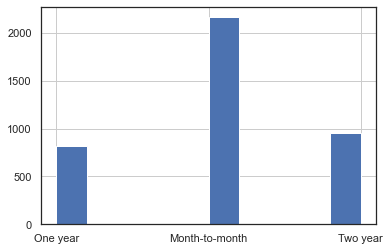

In [70]:
train.contract_type.hist()

In [71]:
explore_df.dtypes

customer_id                              object
is_senior                                 int64
tenure_months                             int64
monthly_charges                         float64
total_charges                           float64
contract_type                            object
internet_service_type                    object
payment_type                             object
is_male_Male                              uint8
has_partner_Yes                           uint8
has_dependents_Yes                        uint8
has_phone_service_Yes                     uint8
has_multiple_lines_No phone service       uint8
has_multiple_lines_Yes                    uint8
has_online_security_Yes                   uint8
has_online_backup_Yes                     uint8
has_device_protection_Yes                 uint8
has_tech_support_Yes                      uint8
has_streaming_tv_Yes                      uint8
has_streaming_movies_Yes                  uint8
has_paperless_billing_Yes               

#### Form a Hypothesis

- H$_{0}$: Churn for customers with month to month contracts <= churn of all customers
- H$_{a}$: Churn for customers with month to month contracts  > churn of all customers

#### Set a Significance Level

In [ ]:
α = 0.05

#### Evaluate Assumptions
- Normal: Yes!
- Independent: Yes!
- Variance:

#### ANSWER 3:
- Customers with month to month contracts ('0')  appear to churn more frequently than other contract types ('1' & '2' year).

### QUESTION 3:
#### What amount of revenue is impacted by the CONTRACT TYPE that churns the most?

In [ ]:
churn_sample = train[train.did_churn_Yes == 1].monthly_charges.sum()
churn_sample

#### ANSWER 3:
- Customers with month to month contracts ('0')  appear to churn more frequently than other contract types ('1' & '2' year).

### QUESTION 4:Is there a relationship between INTERNET SERVICE type and churn?

In [ ]:
print('Is there a relationship between internet service type and churn?')
pd.crosstab(X_train.internet_service_type, y_train, normalize='index').style.background_gradient(cmap='Blues')

In [ ]:
train.internet_service_type.hist()

#### Form a Hypothesis

- H$_{0}$: Churn for customers with fiber optic intenet <= churn of all customers
- H$_{a}$: Churn for customers with fiber optic intenet > churn of all customers

In [ ]:
#### Set a Significance Level
α = 0.05

- d. Assumptions
Normal: Yes!
Independent: Yes!
Variance:

#### ANSWER 4:
- Customers with fiber optic internet appear to churn more frequently than other internet service types.

### QUESTION 4: Is there a relationship between MONTHLY CHARGES and churn?

In [ ]:
sns.boxplot(data=train, y='monthly_charges', x='did_churn_Yes')
plt.title('Do customers that churn pay more per month?')
plt.show()


### STATISTICAL TESTING

#### A. Plot Distribution

In [ ]:
train.monthly_charges.hist()
plt.title('Monthly Charges for All Customers in Sample')
plt.xlabel('Monthly Charges')
plt.ylabel('# of Customers')

churn_sample = train[train.did_churn_Yes == 1].monthly_charges
churn_sample.hist(figsize=(14,7))

plt.title('Monthly Charges for All Customers in Sample VS. Those Who Churned in Sample')
plt.xlabel('Monthly Charges')
plt.ylabel('# of Customers')
plt.legend(labels = ['All Customers', 'Churned Customers'])
plt.show

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(train, x=train.monthly_charges, hue =  'did_churn_Yes', multiple = 'stack', legend = False)


plt.title('Monthly Charges for All Customers in Sample VS. Those Who Churned in Sample', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)
plt.legend(labels = ['All Customers', 'Churned Customers'], loc= 'best')
plt.show

#### B. Form a Hypothesis

- H$_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
- H$_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

#### C. Select Appropriate Test
- 1-Tailed, 1-Sample T-Test - Mean of Subgroup vs. Mean of Overall

#### D. Set a Significance Level (Alpha)

In [ ]:
alpha = 0.05

#### E. Assumptions for 1 Sample T-Test
- Normally Distributed: 
    - Yes, as evidenced by histograms above and sample size, which meets the assumptions of normal distribution.


In [ ]:
train.did_churn_Yes.value_counts()

#### F. Compute test statistic and probability (t-statistic & p-value)

In [ ]:
import scipy.stats as stats

In [ ]:
churn_sample = train[train.did_churn_Yes == 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

## V: MODEL & EVALUATE

The goal is to create a robust and generalizable model that is a mapping between features and a target outcome.

In [ ]:
X_train, y_train = train.drop(columns='did_churn_Yes'), train['did_churn_Yes']
X_val, y_val = validate.drop(columns='did_churn_Yes'), validate['did_churn_Yes']

### QUESTION 2: Is there a relationship between CONTRACT TYPE and churn?

### QUESTION 3: Is there a relationship between INTERNET SERVICE type and churn?

### QUESTION 4: Is there a relationship between MONTHLY CHARGES and churn?

###  Set Baseline

In [ ]:
train.did_churn_Yes.value_counts()

In [ ]:
# Obtain the mode for the target
baseline = y_train.mode()

# produce boolean array with True assigned to match the baseline prediction and real data. 
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

In [ ]:
categorical_columns = list(clean_df.dtypes[clean_df.dtypes == 'object'].index)
categorical_columns

In [ ]:
train = train.drop(columns=['customer_id', 'contract_type', 'internet_service_type', 'payment_type'])
train.head()

In [ ]:
validate = validate.drop(columns=['customer_id', 'contract_type', 'internet_service_type', 'payment_type'])
validate.head()

In [ ]:
test = test.drop(columns=['customer_id', 'contract_type', 'internet_service_type', 'payment_type'])

###  Set X & y

In [ ]:
X_train, y_train = train.drop(columns='did_churn_Yes'), train['did_churn_Yes']
X_val, y_val = validate.drop(columns='did_churn_Yes'), validate['did_churn_Yes']

### Train Model

#### Create the object

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)

#### Fit the Model

In [ ]:
clf1 = clf1.fit(X_train, y_train)

#### Visualize a Decision Tree

In [ ]:
plt.figure(figsize=(22, 12))
plot_tree(clf1,feature_names=X_train.columns)

#### Make Predictions 

In [ ]:
y_pred = clf1.predict(X_train)
y_pred[0:20]

#### Estimate Probability

In [ ]:
y_pred_proba = clf1.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['No Churn', 'Churn'])

### Evaluate Model

#### Compute Accuracy

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

#### Create a Confusion Matrix

- True Positive: number of occurrences where y is true and y is predicted true.
- True Negative: number of occurrences where y is false and y is predicted false.
- False Positive: number of occurrences where y is false and y is predicted true.
- False Negative: number of occurrences where y is true and y is predicted false.

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

#### Create a Classificaiton Report

In [ ]:
print(classification_report(y_train, y_pred))

### Evaluate the Model with our Validate dataset

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

In [ ]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
# Model 1

positive = '0'

model_accuracy = (df.model1 == df.actual).mean()
baseline_accuracy = (df.baseline == df.actual).mean()

# precision -- how good are our positive predictions?
# precision -- model performance | predicted positive
subset = df[df.model1  == positive]
model_precision = (subset.model1  == subset.actual).mean()
subset = df[df.baseline == positive]
baseline_precision = (subset.baseline == subset.actual).mean()

# recall -- how good are we at detecting actual positives?
# recall -- model performance | actual positive
subset = df[df.actual == positive]
model_recall = (subset.model1  == subset.actual).mean()
baseline_recall = (subset.baseline == subset.actual).mean()


print(f'   model 1 accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')
print()
print(f'   model 1 recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')
print()
print(f'   model 1 precision: {model_precision:.2%}')
print(f'baseline precision: {baseline_precision:.2%}')

In [ ]:
model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(X_train[features], y_train)
accuracy = model1.score(X_validate[features], y_validate)
print(f'Model 1 Accuracy: {accuracy:.2%}')

In [ ]:
plt.figure(figsize=(13, 7))
plot_tree(model1, feature_names=features, class_names=['No Churn', 'Churn'])
plt.show()

Answer key questions, your hypotheses, and figure out the drivers of churn. You are required to run at least 2 statistical tests in your data exploration. Make sure you document your hypotheses, set your alpha before running the tests, and document your findings well.
Create visualizations and run statistical tests that work toward discovering variable relationships (independent with independent and independent with dependent). The goal is to identify features that are related to churn (your target), identify any data integrity issues, and understand 'how the data works'. If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.
For example: We may find that all who have online services also have device protection. In that case, we don't need both of those.
Below are some questions you might decide to explore in this stage:
If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts?
For Example: You might plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)
Are there features that indicate a higher propensity to churn?
For Example: type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)
How much of monthly_charges can be explained by internet_service_type?
Hint: Run a correlation test. State your hypotheses and document your findings clearly.
How much of monthly_charges can be explained by internet_service_type + phone_service_type (0, 1, or multiple lines).


In [ ]:
model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(X_train[features], y_train)
accuracy = model1.score(X_validate[features], y_validate)
print(f'Model 1 Accuracy: {accuracy:.2%}')

In [ ]:
observed = pd.crosstab(train.internet_service_type, train.did_churn_Yes, margins=True)
observed

In [ ]:
# set our alpha
alpha = 0.05

## VI: DELIVERY
The goal is to enable others to use what you have learned or developed through all the previous stages.

Questions:
1. Do those who churn spend more than those who don't?

2. Are certain internet types more likely to churn?

#### T-Test

- H0: The monthly charges for those who churn are <= the monthly charges for those who do not churn.
- Ha: The monthly charges for those who churn are > the monthly charnges for those who do not churn

In [ ]:
train.

In [ ]:
#T-Test across 2 groups - boolean comparison of means - subgroup vs. subgroup


Verify Assumptions: 
    Normal Distribution



- H0: The churn rate for fiber-optic month-to-month customers >= than the churn rate for all internet customers. 
- Ha: The churn rate for fiber-optic month-to-month customers < than the churn rate for all internet customers. 

In [ ]:
Comparison of realtionships (boolean vs. boolean)


In [ ]:
catcols = [col for col in acquire_df.columns if acquire_df[col].dtype == 'O']

In [ ]:
for col in catcols:
    print(f'Column: {col}')
    print(acquire_df[col].value_counts())
    print('-------')
    print(acquire_df[col].value_counts(normalize=True, dropna=False))
    print('====================')